In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("E:\DS Assignment\EDA1\EDA1\Cardiotocographic.csv")
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [3]:
# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())

# Fill missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Verify that there are no missing values after handling
print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values before handling:
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

Missing values after handling:
LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [4]:
# Check data types
print("Data types before handling:")
print(df.dtypes)

# Identify columns that are not numerical and attempt to convert them
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col])
        except ValueError:
            print(f"Column '{col}' could not be converted to numeric.")
            # Handle non-numeric columns as needed (e.g., drop or encode)
            # For now, we'll leave them as object type

# Verify data types after handling
print("\nData types after handling:")
print(df.dtypes)

Data types before handling:
LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

Data types after handling:
LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


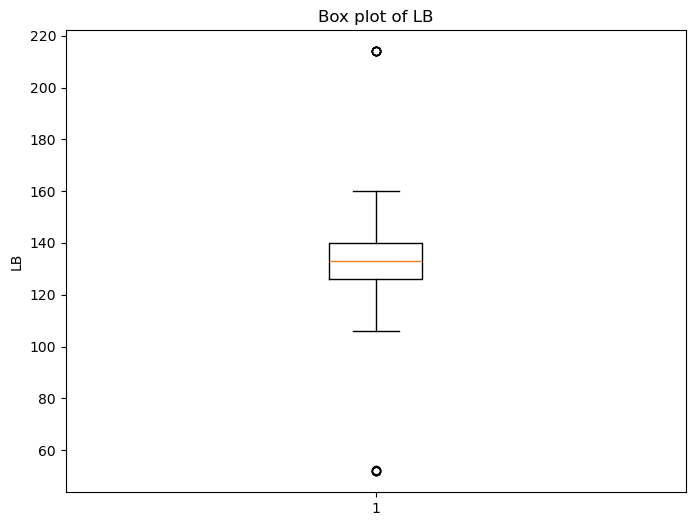

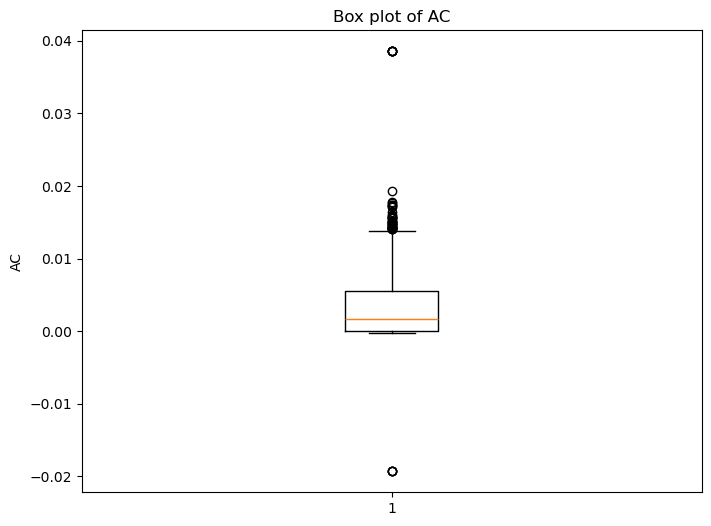

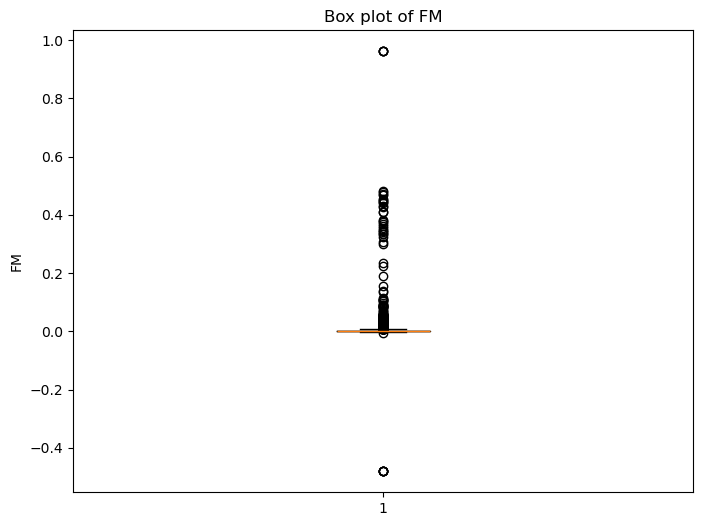

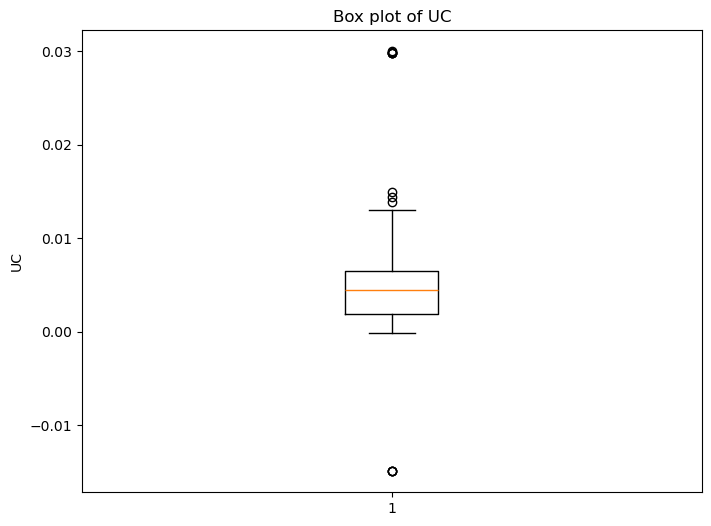

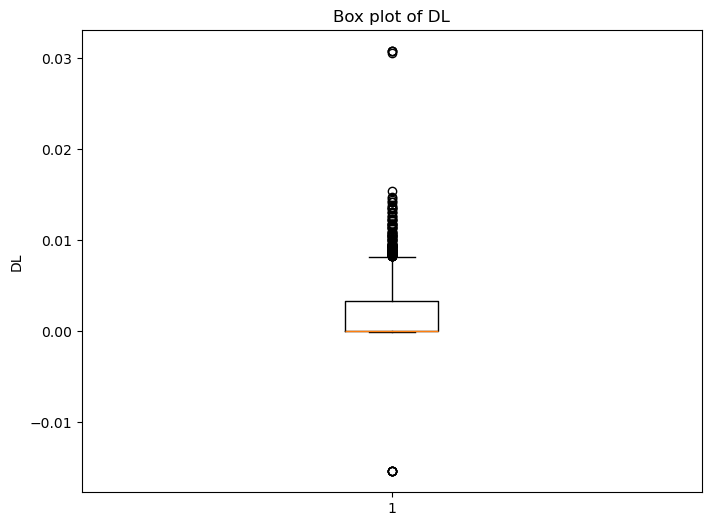

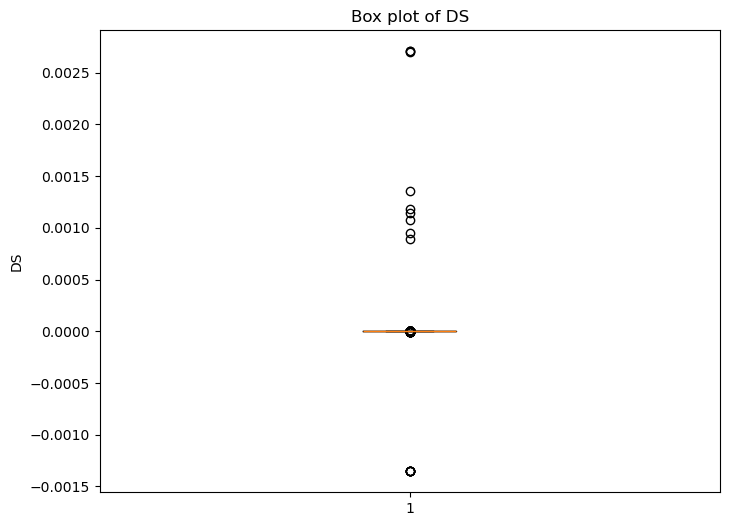

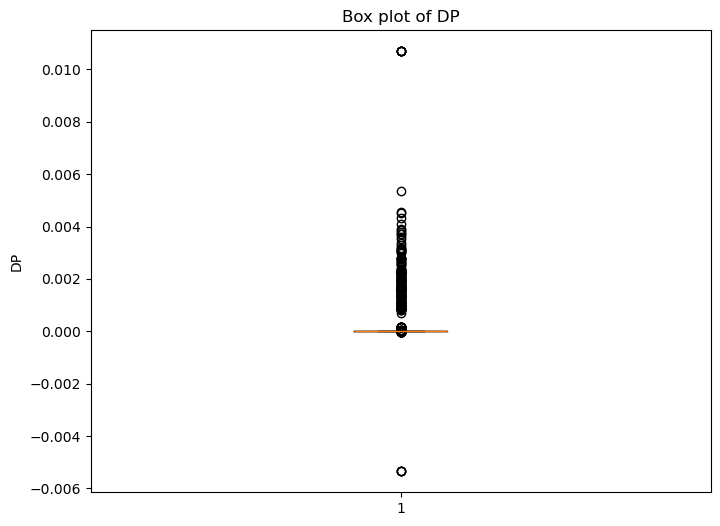

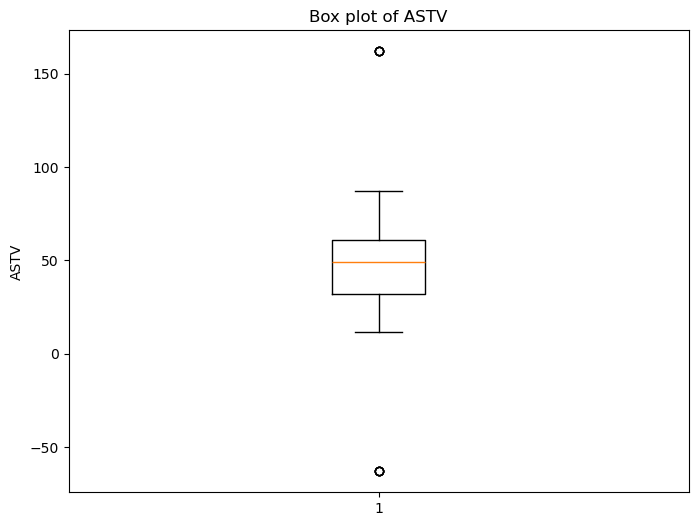

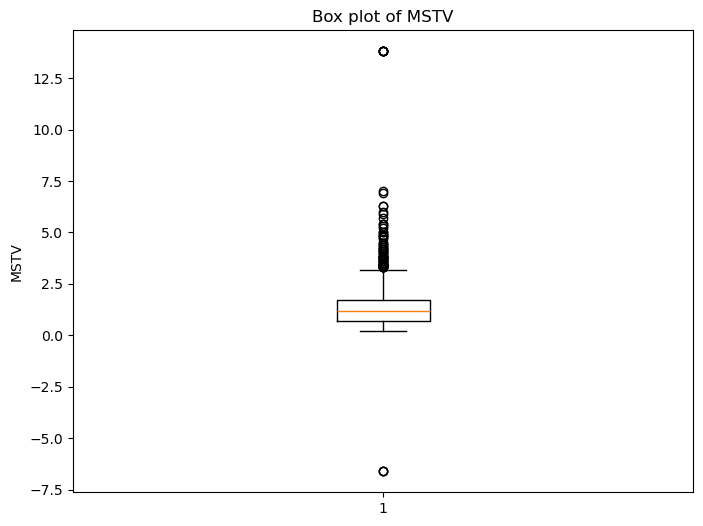

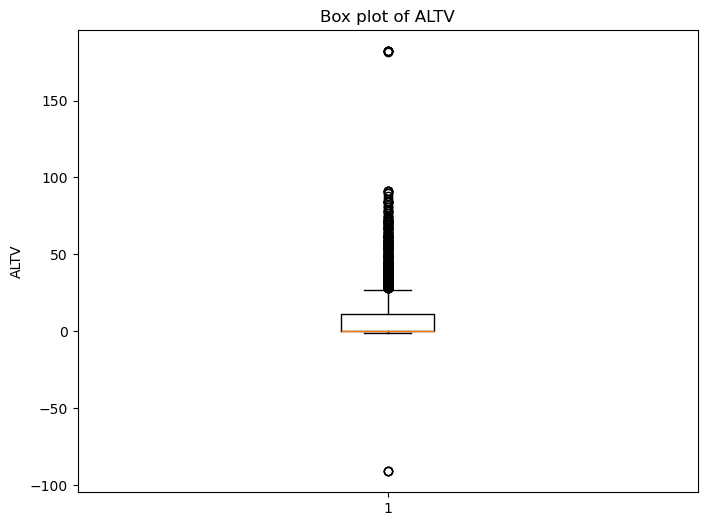

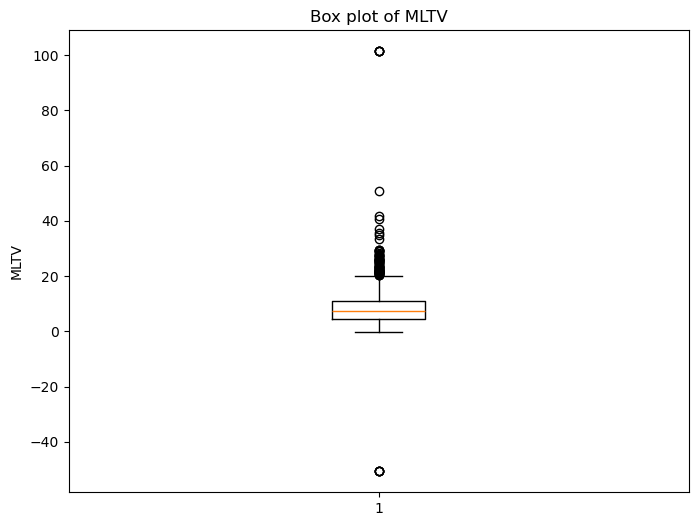

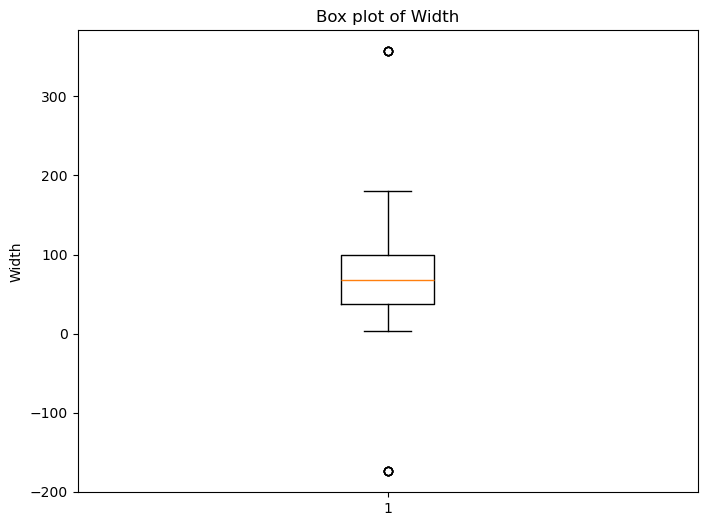

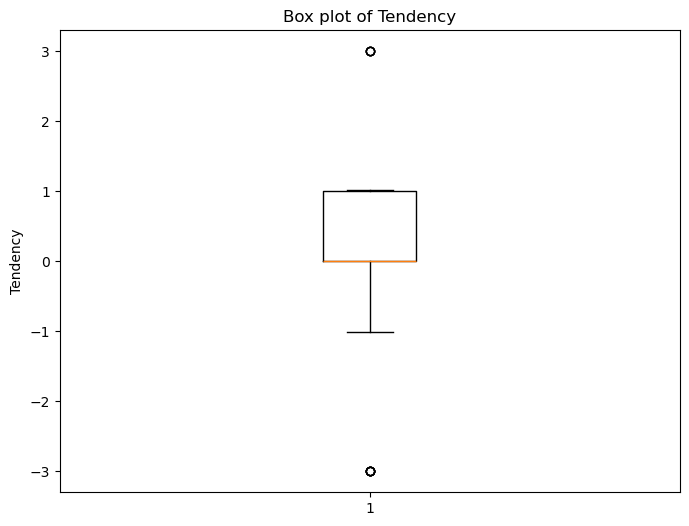

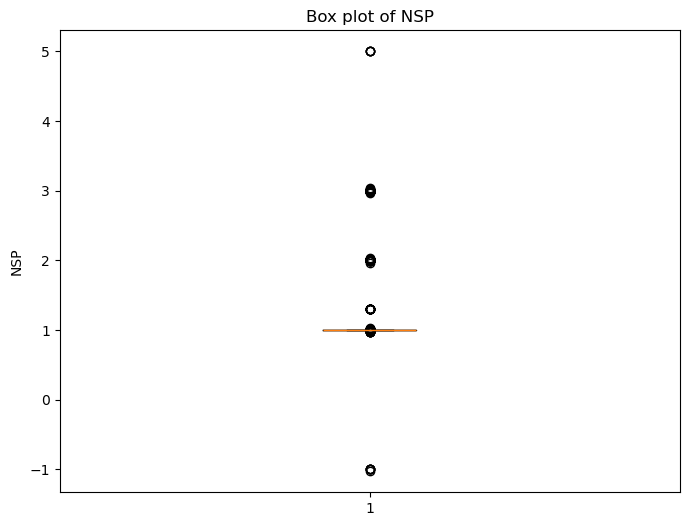

In [5]:
import matplotlib.pyplot as plt

# Create box plots for each numerical column
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[col])
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
    plt.show()

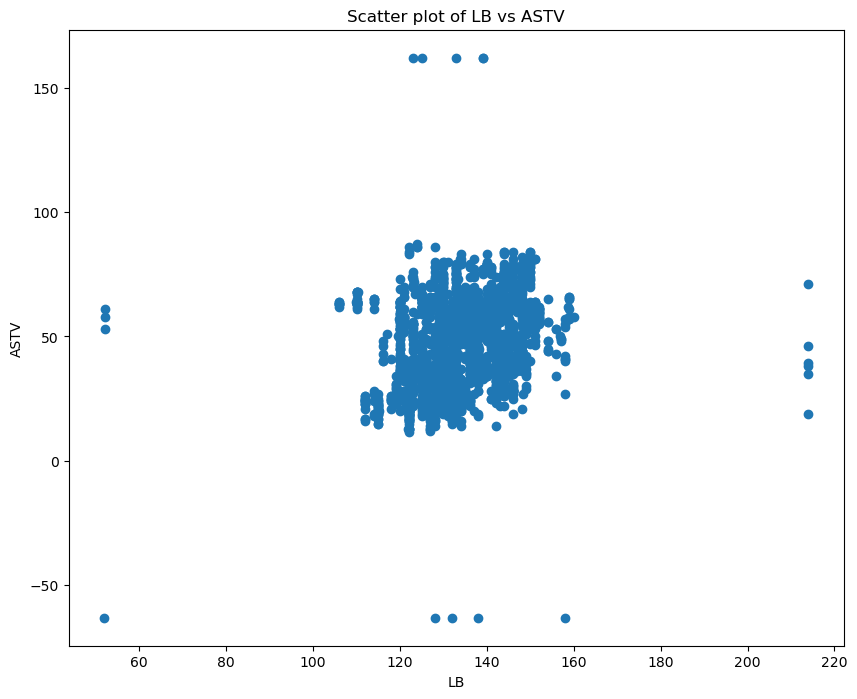

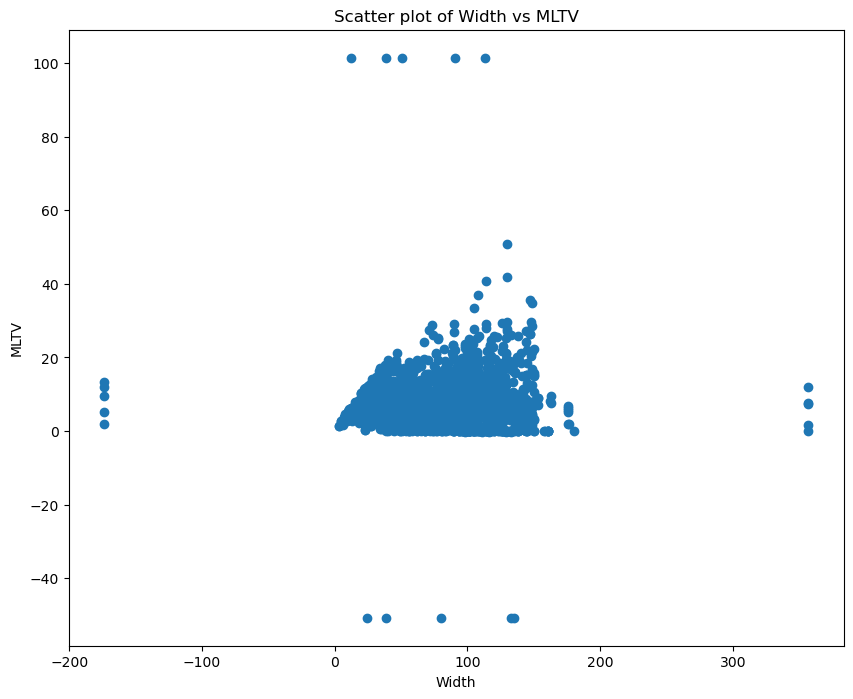

In [6]:
# Generate scatter plots for relevant pairs of features
plt.figure(figsize=(10, 8))
plt.scatter(df['LB'], df['ASTV'])
plt.xlabel('LB')
plt.ylabel('ASTV')
plt.title('Scatter plot of LB vs ASTV')
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(df['Width'], df['MLTV'])
plt.xlabel('Width')
plt.ylabel('MLTV')
plt.title('Scatter plot of Width vs MLTV')
plt.show()

In [7]:
# Calculate IQR and identify outliers for each numerical column
outlier_indices = {}
for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    outlier_indices[col] = outliers

# Print the number of outliers found for each column
for col, indices in outlier_indices.items():
    print(f"Column '{col}': {len(indices)} outliers found")

Column 'LB': 10 outliers found
Column 'AC': 43 outliers found
Column 'FM': 347 outliers found
Column 'UC': 13 outliers found
Column 'DL': 125 outliers found
Column 'DS': 141 outliers found
Column 'DP': 305 outliers found
Column 'ASTV': 10 outliers found
Column 'MSTV': 80 outliers found
Column 'ALTV': 318 outliers found
Column 'MLTV': 81 outliers found
Column 'Width': 10 outliers found
Column 'Tendency': 10 outliers found
Column 'NSP': 580 outliers found


In [8]:
for col, indices in outlier_indices.items():
    median_val = df[col].median()
    df.loc[indices, col] = median_val

display(df.head())

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,0.0,2.4,64.0,0.999926,1.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,7.5,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


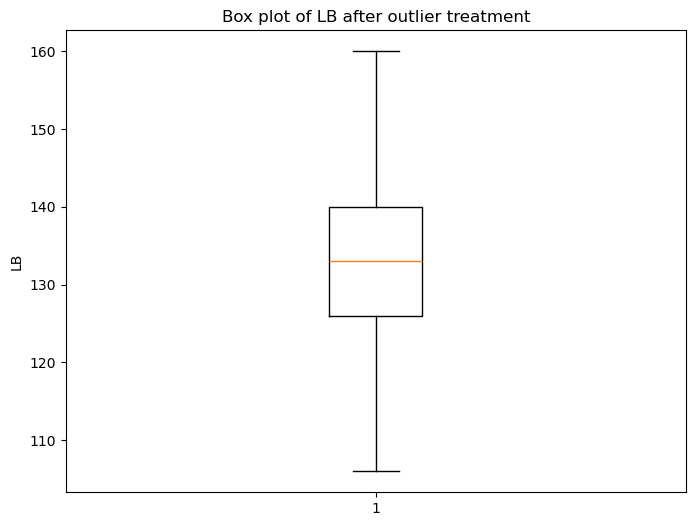

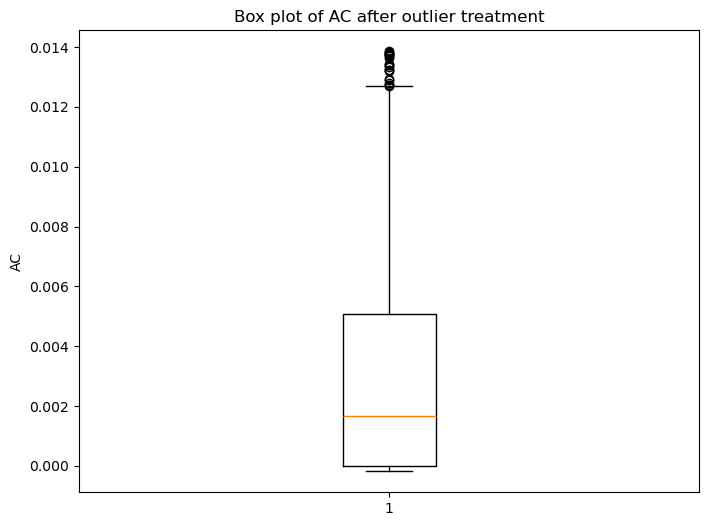

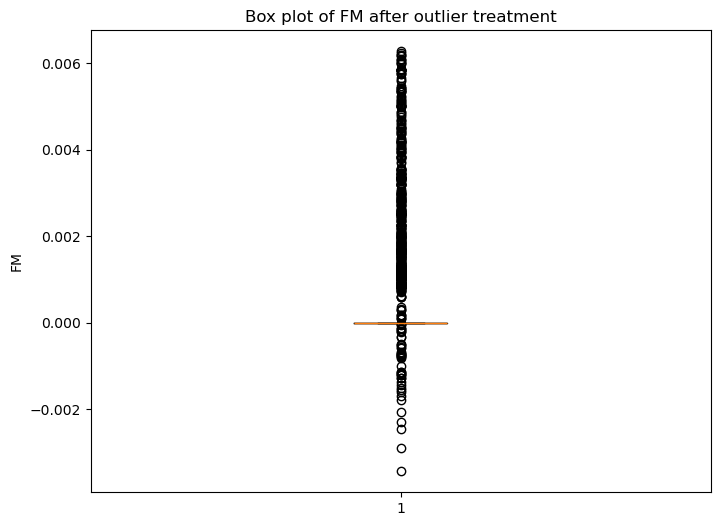

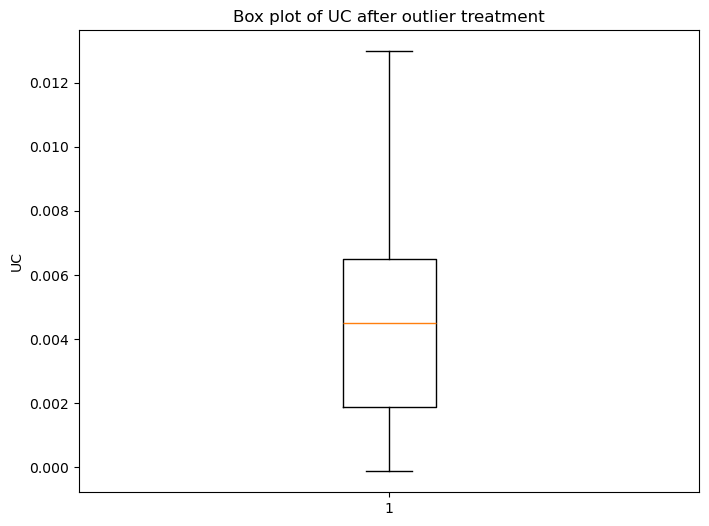

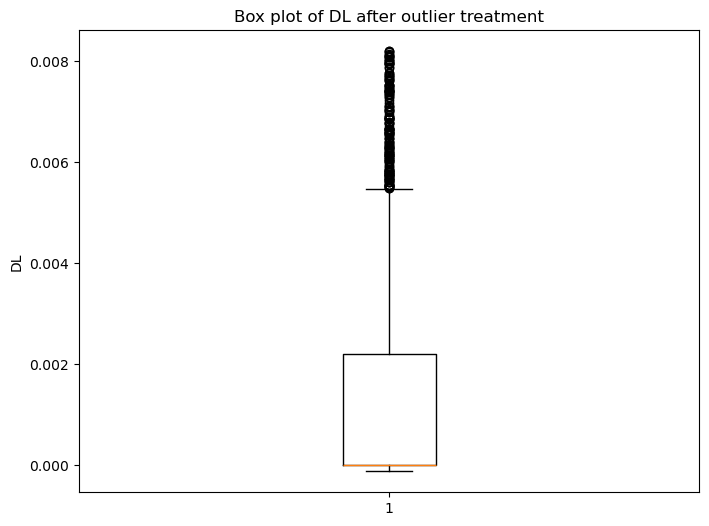

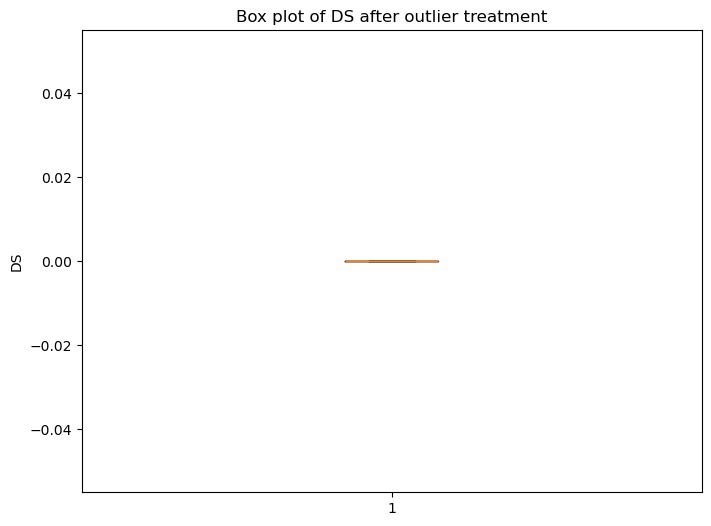

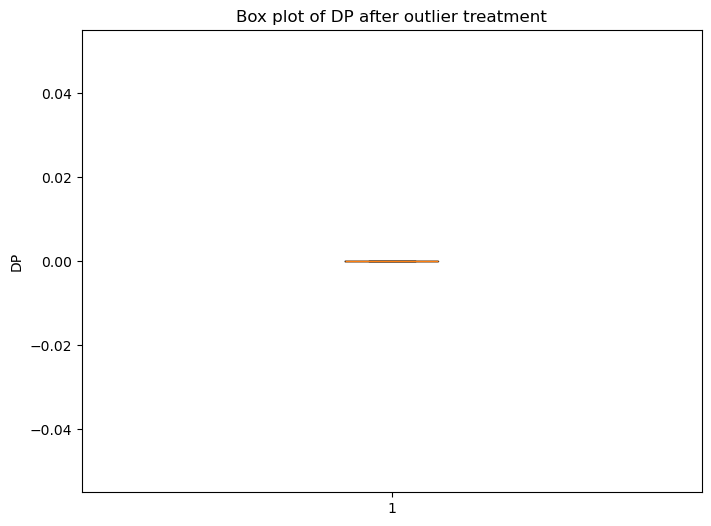

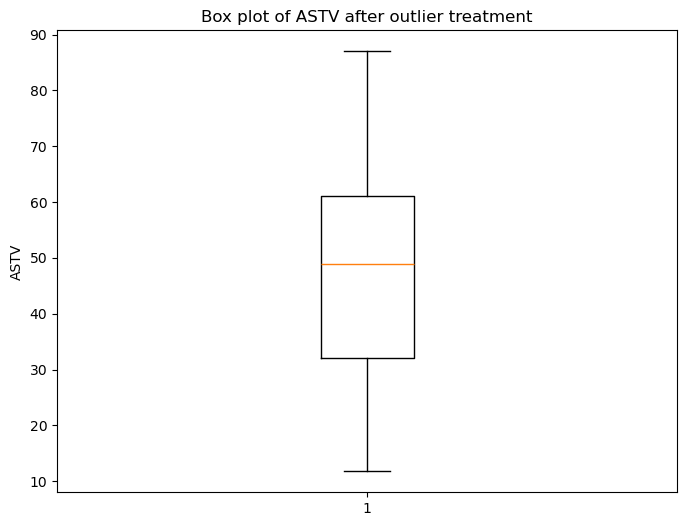

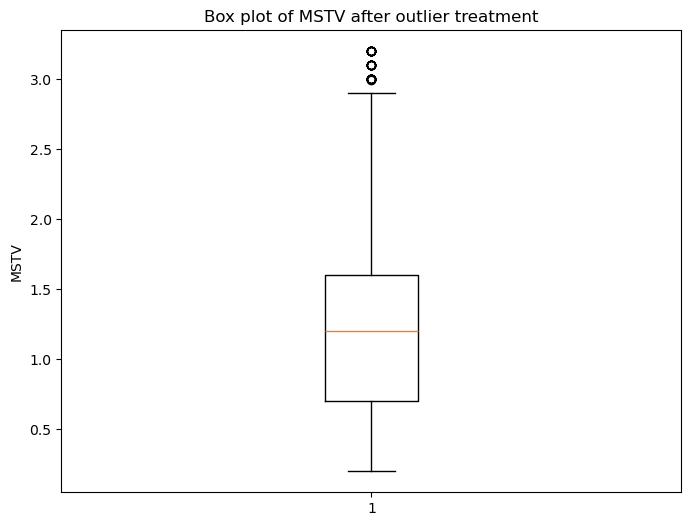

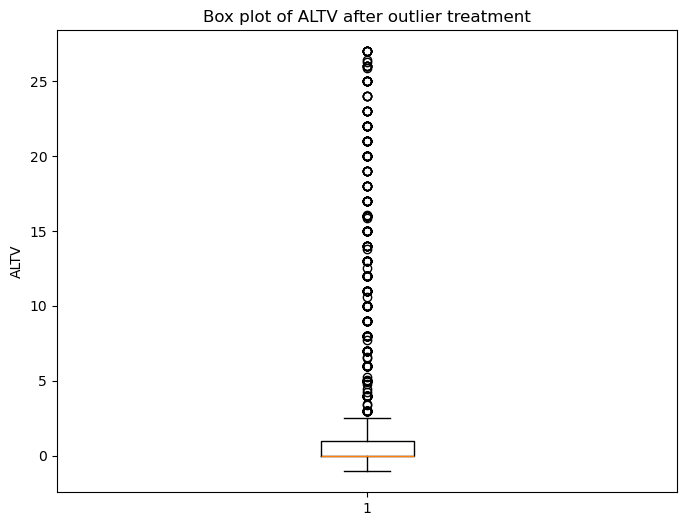

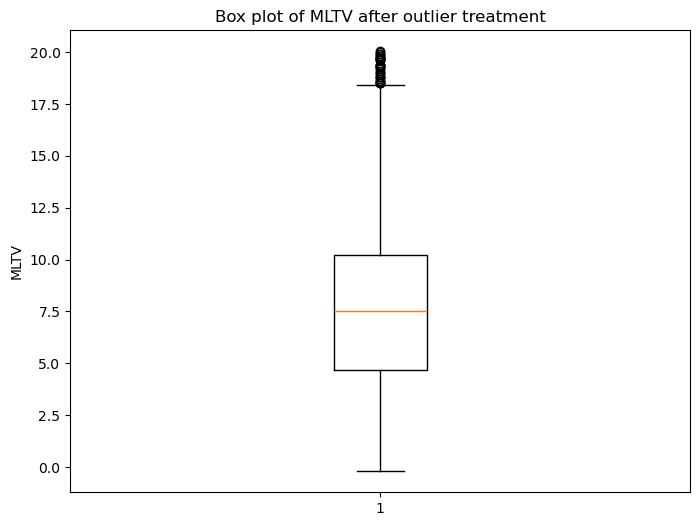

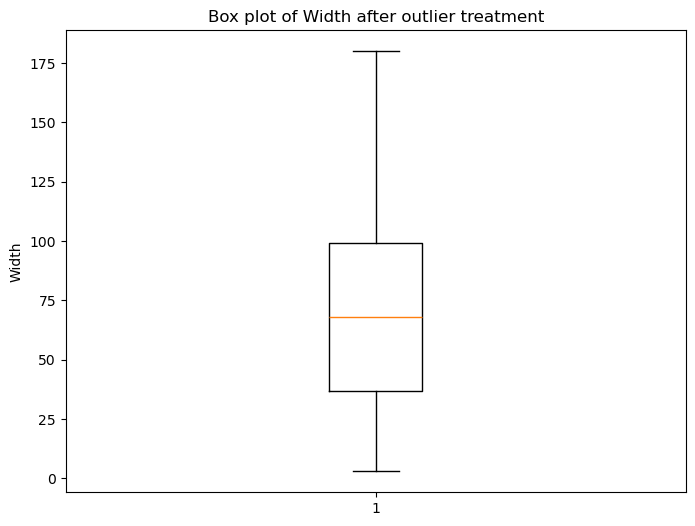

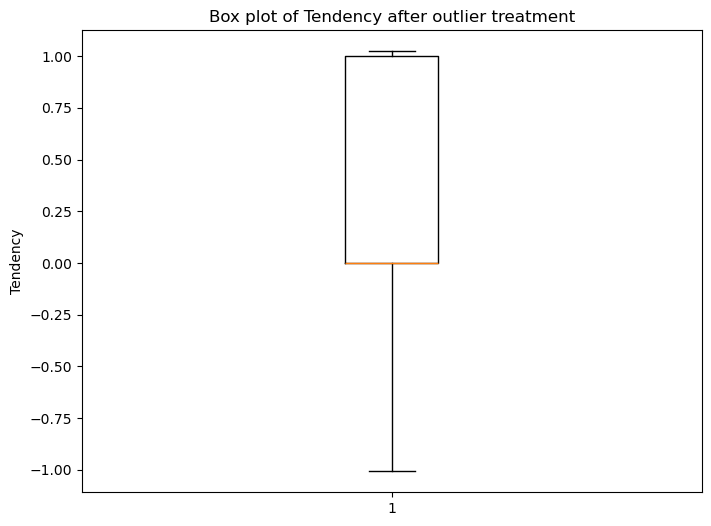

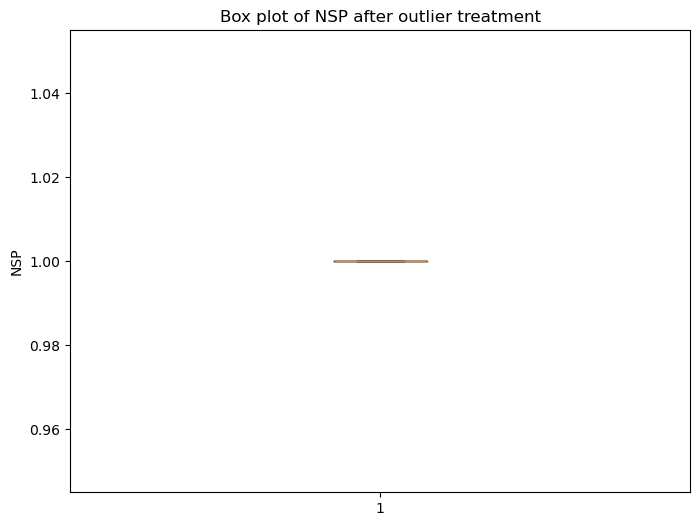

In [9]:
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[col])
    plt.title(f'Box plot of {col} after outlier treatment')
    plt.ylabel(col)
    plt.show()

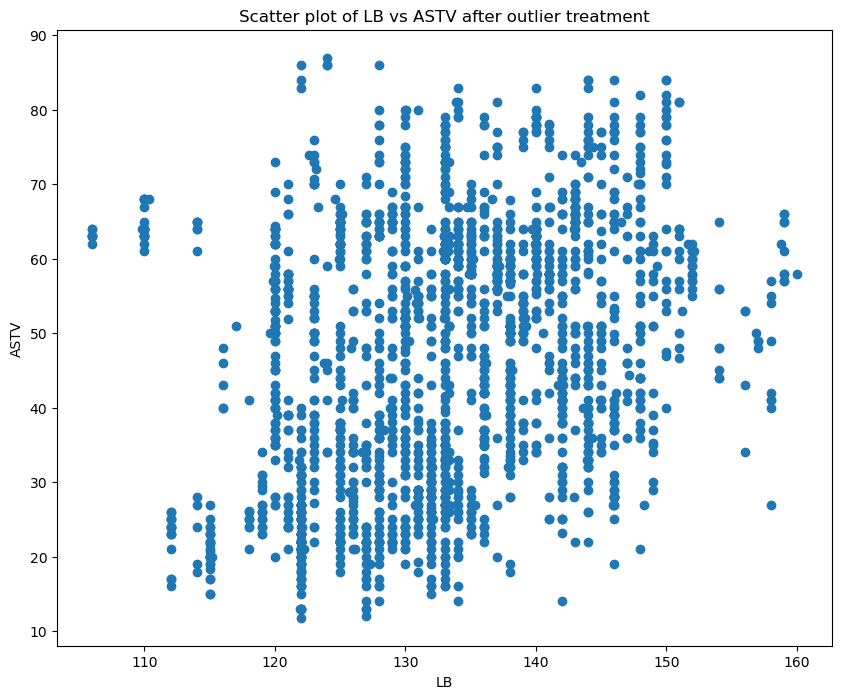

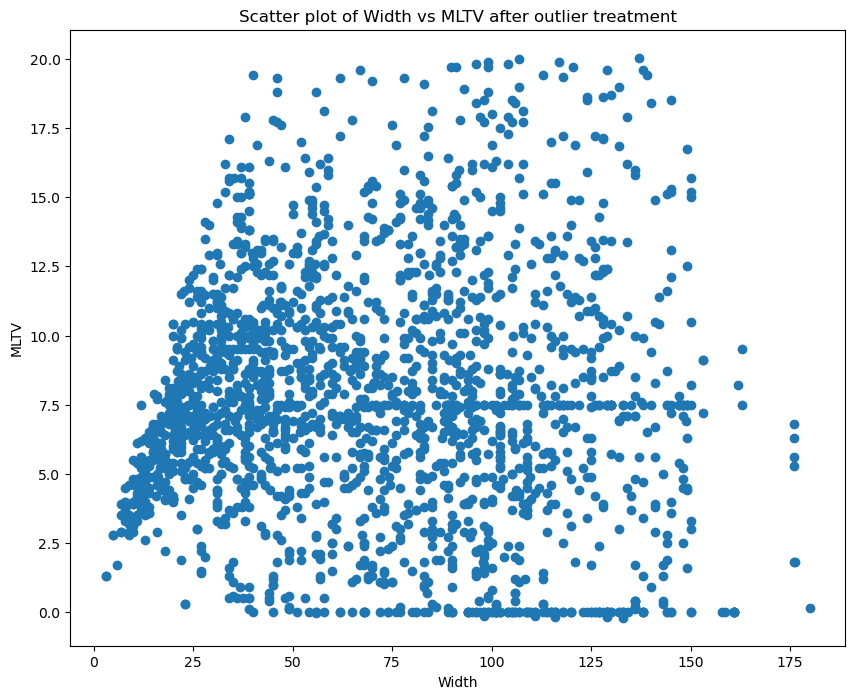

In [10]:
plt.figure(figsize=(10, 8))
plt.scatter(df['LB'], df['ASTV'])
plt.xlabel('LB')
plt.ylabel('ASTV')
plt.title('Scatter plot of LB vs ASTV after outlier treatment')
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(df['Width'], df['MLTV'])
plt.xlabel('Width')
plt.ylabel('MLTV')
plt.title('Scatter plot of Width vs MLTV after outlier treatment')
plt.show()

In [11]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.0,2126.0,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.0
mean,133.267384,0.002940,0.000554,0.004341,0.001324,0.0,0.0,46.993632,1.235030,2.640408,7.594481,70.318724,0.319192,1.0
std,9.743448,0.003495,0.001300,0.002911,0.002156,0.0,0.0,17.157976,0.685014,5.748781,4.438410,38.615207,0.607102,0.0
min,106.000000,-0.000185,-0.003435,-0.000132,-0.000124,0.0,0.0,11.799846,0.200000,-1.043619,-0.200788,3.000000,-1.006614,1.0
25%,126.000000,0.000000,0.000000,0.001880,0.000000,0.0,0.0,32.000000,0.700000,0.000000,4.696705,37.000000,0.000000,1.0
50%,133.000000,0.001668,0.000000,0.004484,0.000000,0.0,0.0,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.0
75%,140.000000,0.005081,0.000000,0.006504,0.002192,0.0,0.0,61.000000,1.600000,1.000000,10.200000,99.000000,1.000000,1.0
max,160.000000,0.013861,0.006272,0.012987,0.008197,0.0,0.0,87.000000,3.200000,27.000000,20.040354,180.000000,1.023635,1.0


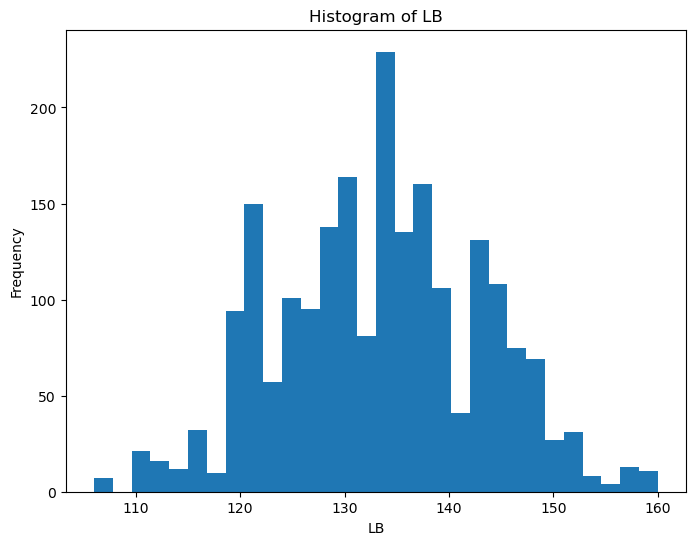

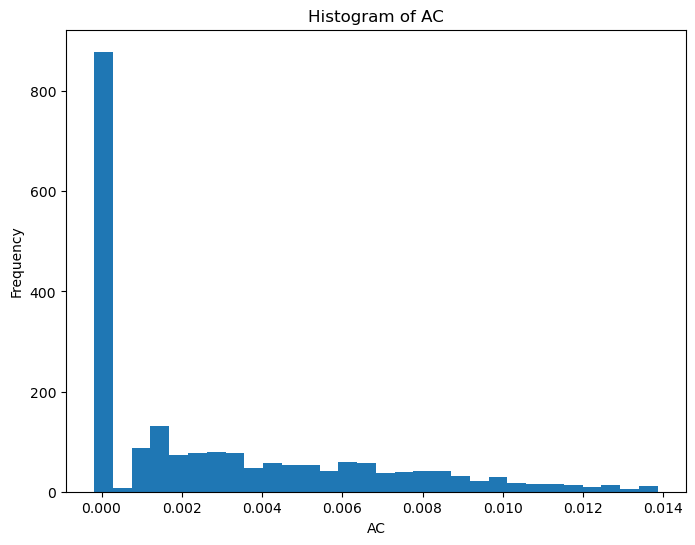

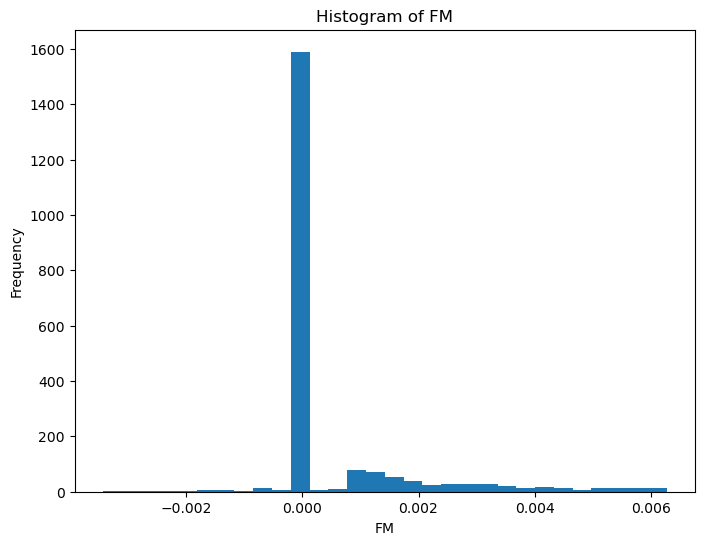

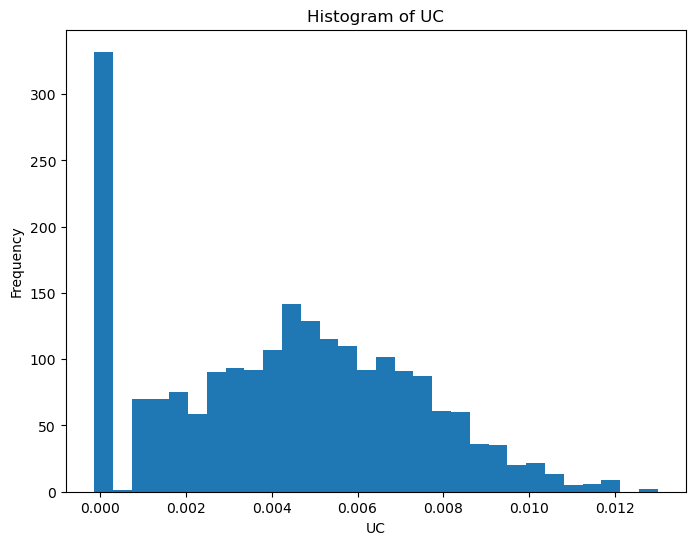

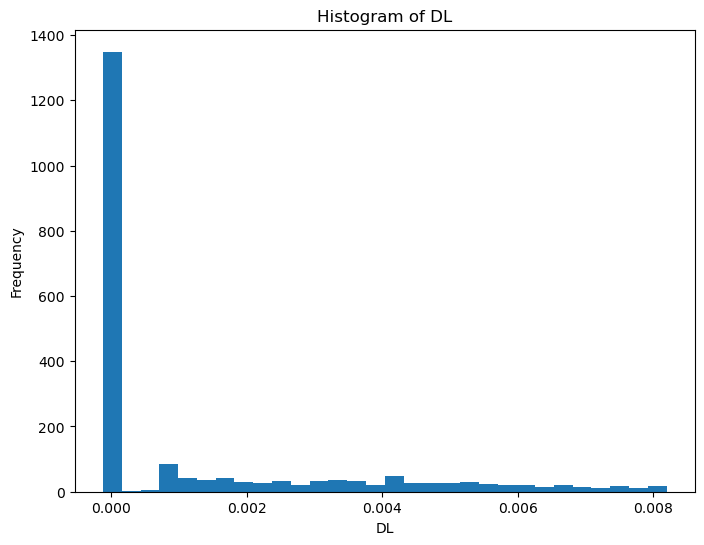

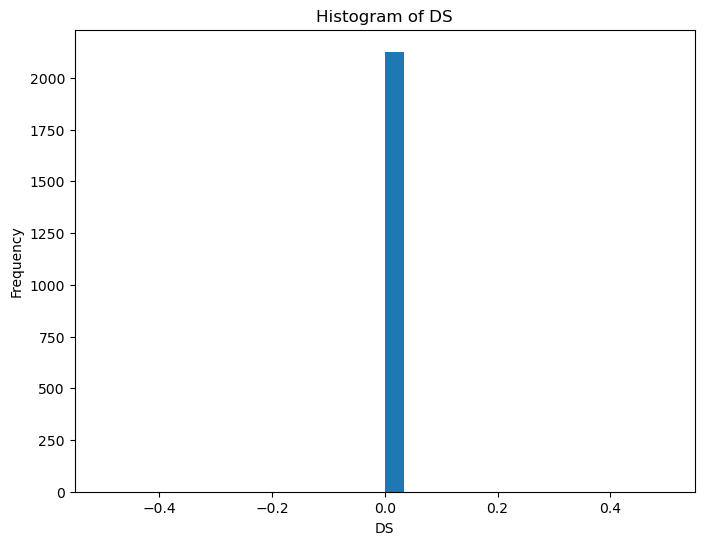

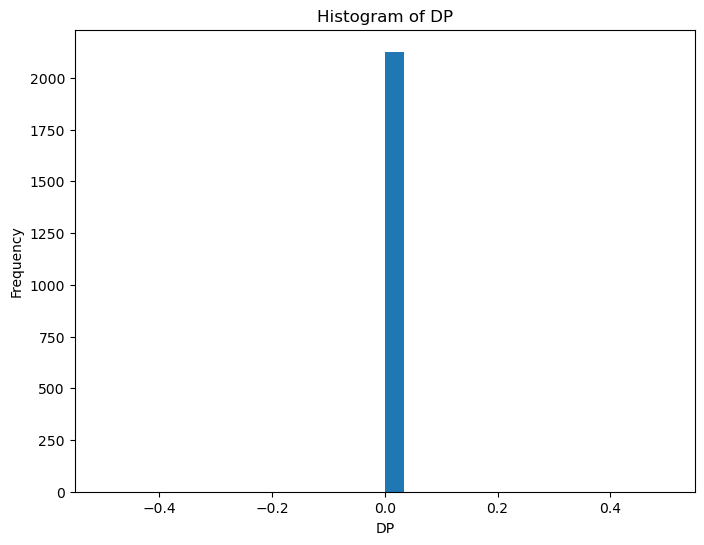

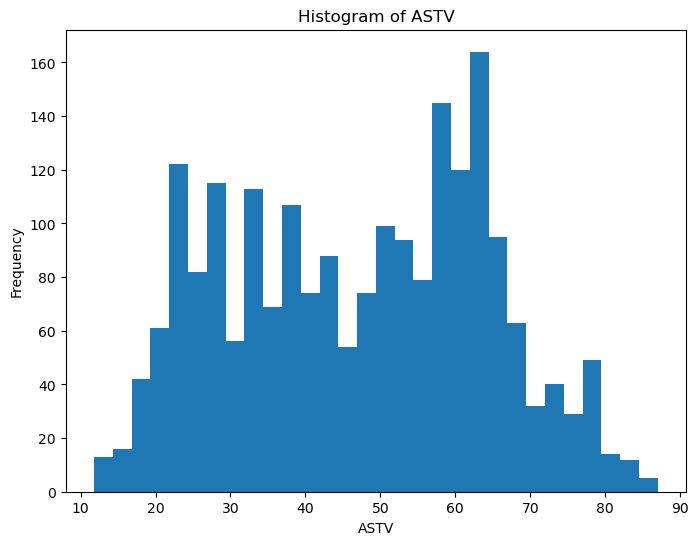

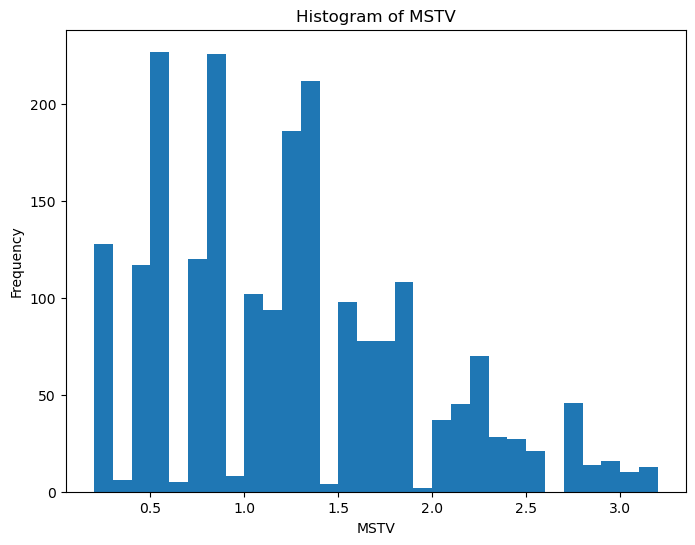

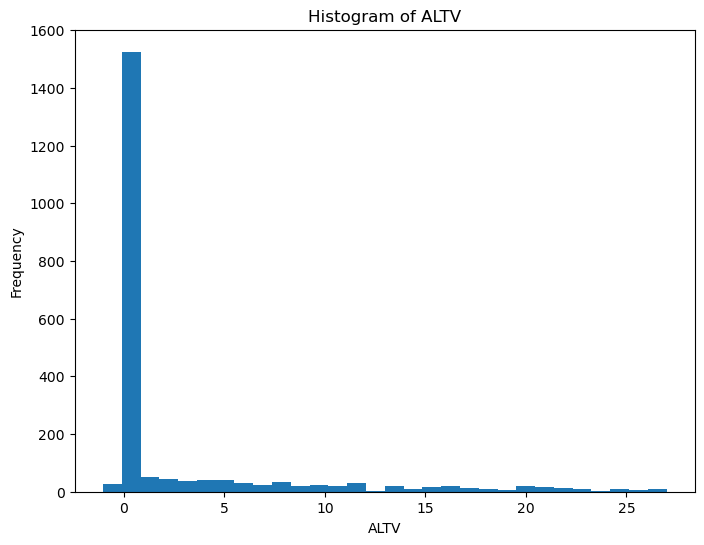

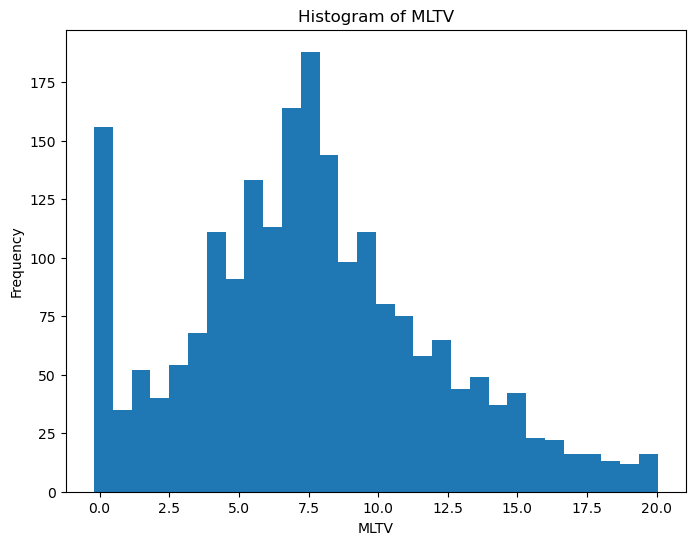

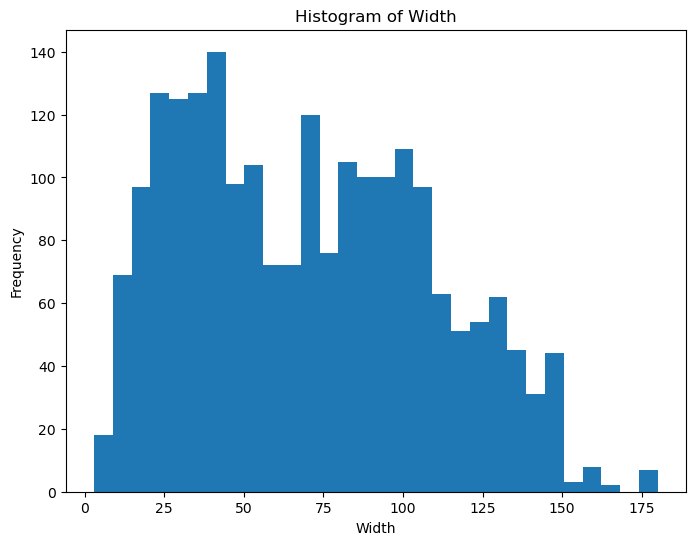

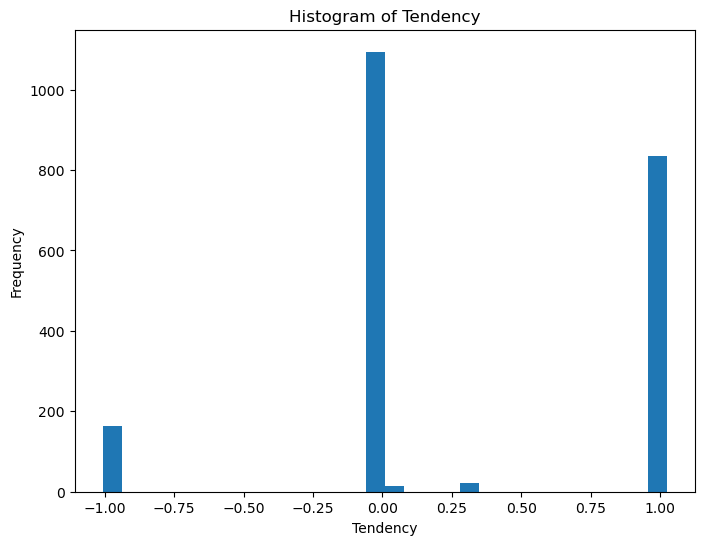

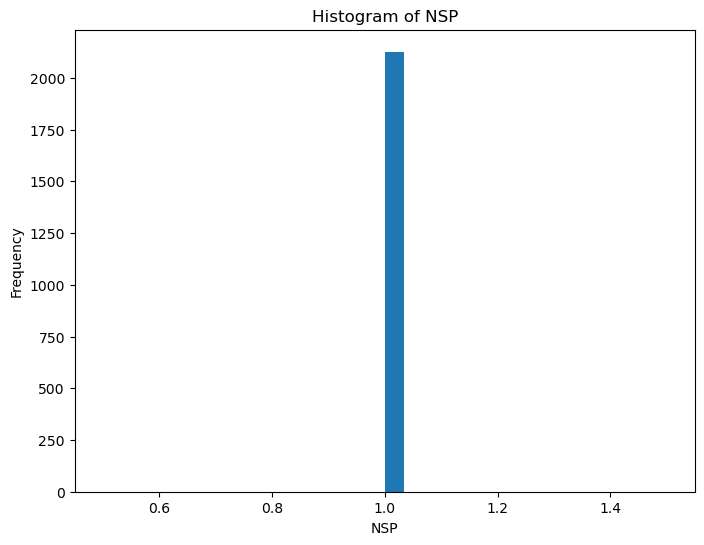

In [12]:
#Visualization
#Creating Histograms For the Numerical Columns
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=30)  # You can adjust the number of bins
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [1]:
# There are no Categorical Variables to Use bar charts or pie charts to display the frequency of categories for categorical variables.

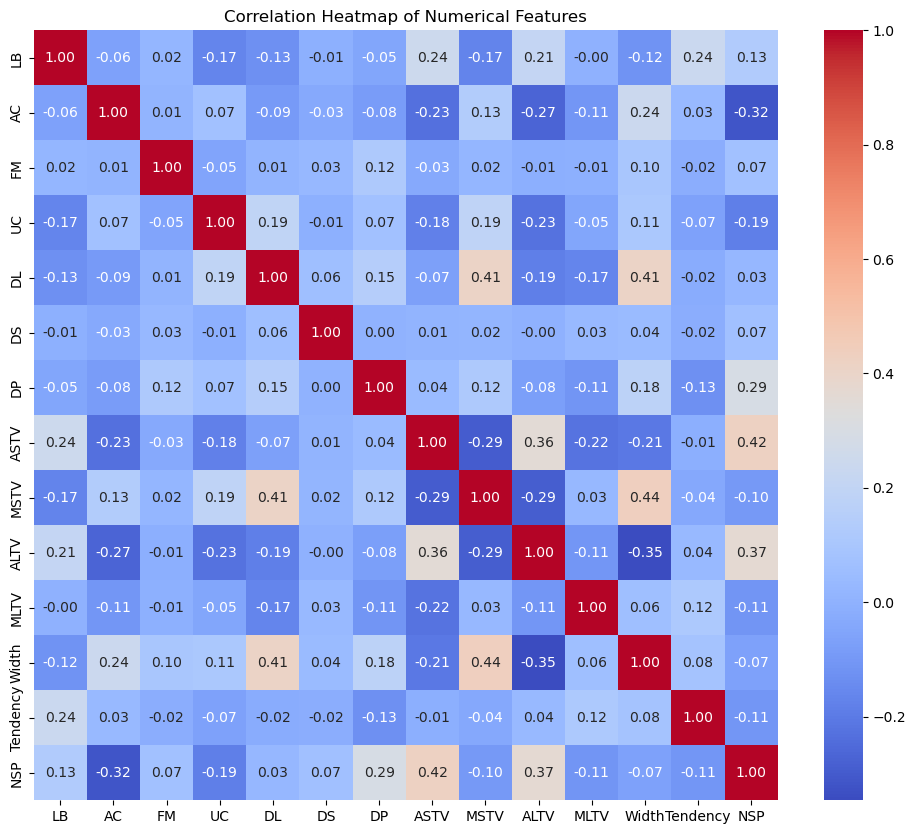

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

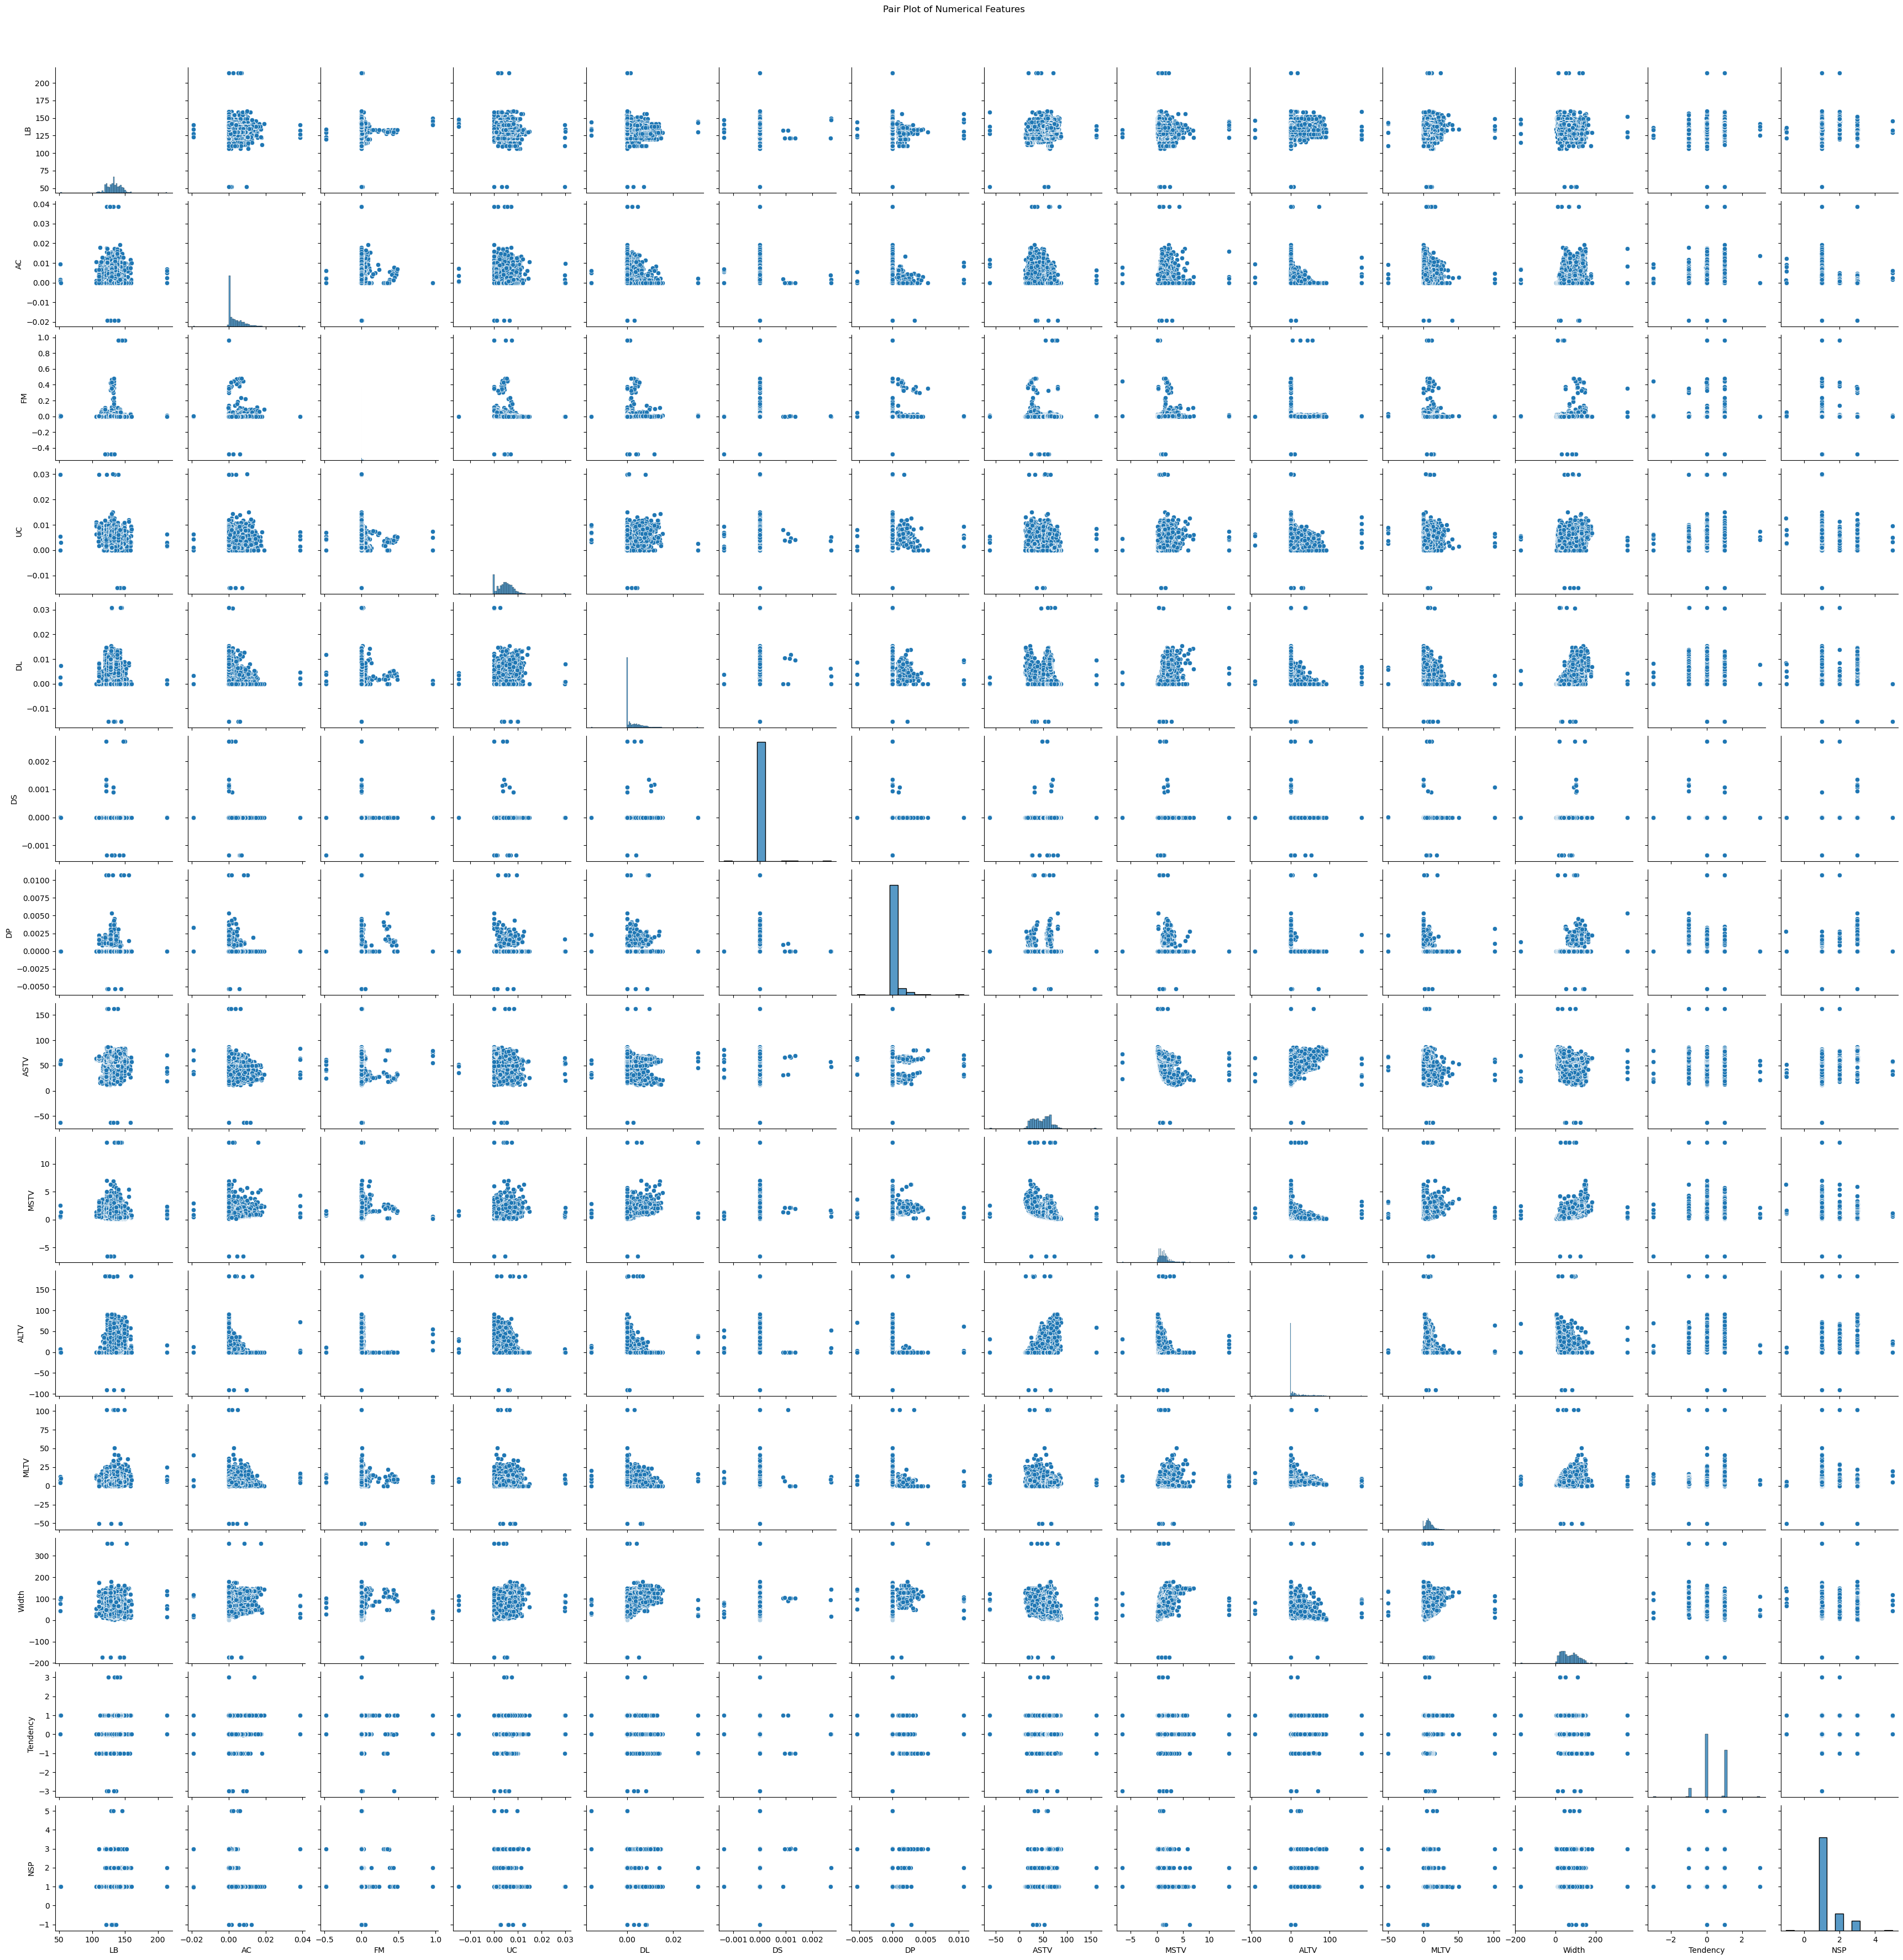

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pair plot
sns.pairplot(df)
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

In [7]:
#Notable Correlations and Implications:

#High positive correlation between Width and DL: This suggests that as the Width of the signal increases, the number of DL ( decelerations) also tends to increase. This could indicate that wider signals are associated with more frequent decelerations, which might be a sign of fetal distress.
#Moderate negative correlation between AC (accelerations) and LB (baseline heart rate): This indicates that as the baseline heart rate (LB) increases, the number of accelerations (AC) tends to decrease. This relationship might be important for assessing fetal well-being, as a lower baseline heart rate with more accelerations is often considered a positive sign.
#Moderate positive correlation between ASTV (short-term variability) and ALTV (long-term variability): This is expected, as both measure variability in the heart rate. A healthy fetus typically exhibits moderate variability.
#Moderate positive correlation between ASTV and NSP (perinatal outcome): This suggests that higher short-term variability is associated with a better perinatal outcome.
#Moderate negative correlation between AC and NSP: This indicates that a higher number of accelerations is associated with a better perinatal outcome.

In [8]:
#In the dataset,there is no explicit temporal data (like timestamps or dates) available in the columns. 
#Therefore, There are no trends or patterns over time using this dataset.

In [9]:
#exploratory data analysis performed so far, here is a summary of the key insights and patterns discovered:

#Missing Values: The dataset initially had missing values in several columns (LB, AC, DS, DP, MLTV, Width, Tendency, and NSP). These were successfully handled by filling them with the mean of their respective columns.
#Data Types: All columns were found to be of numerical data types (float64), and no inconsistencies were detected or required conversion.
#Outliers: Outliers were detected using the IQR method, and a significant number were found in columns such as FM, DS, DP, ALTV, and NSP. These outliers were treated by replacing them with the median value of the respective columns, which helped normalize the data distribution as seen in the post-treatment box plots.
#Correlations and Relationships: The correlation heatmap and pair plot revealed several interesting relationships between variables:
#A strong positive correlation between Width and DL.
#A moderate negative correlation between AC and LB.
#oderate positive correlations between ASTV and ALTV, and between ASTV and NSP.
#A moderate negative correlation between AC and NSP. These correlations suggest potential indicators for perinatal outcomes and relationships between different measures of fetal heart rate.
#Temporal Data: It was determined that the dataset does not contain explicit temporal information, so analyzing trends over time was not possible.
#Overall Insights:
#The data contains several features related to cardiotocography that show meaningful correlations with the perinatal outcome (NSP). The data cleaning process, including handling missing values and treating outliers, has prepared the data for further analysis or machine learning model building. The presence of a high number of outliers in certain columns might warrant further investigation into the data collection process or the inherent variability of those specific physiological measures.